In [2]:
import pandas as pd
from sklearn import model_selection, linear_model, svm, preprocessing
import matplotlib.pyplot as plt

## Load the dataset

In [3]:
input_file = "data.csv"
df = pd.read_csv(input_file, header = 0)

### Split into input (X) and output (y) variables

In [4]:
dataset = df.values
X = dataset[:,1:7]
y = dataset[:,7]
y = y.astype('int')

In [5]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X_std = scaler.transform(X)

## Testing for best model

In [10]:
log_reg_train = []
log_reg_cross = []
lin_svm_train = []
lin_svm_cross = []
rbf_svm_train = []
rbf_svm_cross = []
poly_svm_train = []
poly_svm_cross = []
for i in range(10):
    X_train, X_cross, y_train, y_cross = model_selection.train_test_split(X_std, y, train_size=.8, random_state=i)
    # Logistic Regression:
    reg = linear_model.LogisticRegression(random_state=i)
    reg.fit(X_train, y_train)
    log_reg_train.append(reg.score(X_train, y_train))
    log_reg_cross.append(reg.score(X_cross, y_cross))
    # Support Vector Machine:
    clf1 = svm.SVC(kernel='linear', C=1, gamma=1, random_state=i)
    clf1.fit(X_train, y_train)
    lin_svm_train.append(clf1.score(X_train, y_train))
    lin_svm_cross.append(clf1.score(X_cross, y_cross))
    clf2 = svm.SVC(kernel='rbf', C=1, gamma=1, random_state=i)
    clf2.fit(X_train, y_train)
    rbf_svm_train.append(clf2.score(X_train, y_train))
    rbf_svm_cross.append(clf2.score(X_cross, y_cross))
    clf3 = svm.SVC(kernel='poly', C=1, gamma=1, random_state=i)
    clf3.fit(X_train, y_train)
    poly_svm_train.append(clf3.score(X_train, y_train))
    poly_svm_cross.append(clf3.score(X_cross, y_cross))

c:\users\dgilmarn\pycharmprojects\mlearn\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dgilmarn\pycharmprojects\mlearn\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dgilmarn\pycharmprojects\mlearn\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dgilmarn\pycharmprojects\mlearn\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dgilmarn\pycharmprojects\mlearn\venv\lib\site-packages\sklearn\linear_model\logisti

Logistic Regression: Blue,
Linear SVM: Orange,
RBF SVM: Green,
Poly SVM: Red

Text(0.5, 1.0, 'Training Scores')

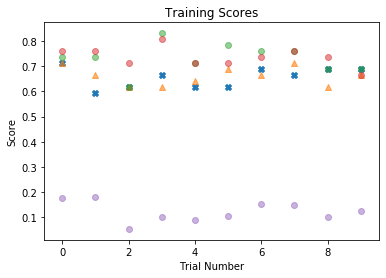

In [11]:
x = range(10)
fig, ax = plt.subplots()
ax.scatter(x, log_reg_train, marker='X')
ax.scatter(x, lin_svm_train, alpha = .6, marker='^')
ax.scatter(x, rbf_svm_train, alpha = .5)
ax.scatter(x, poly_svm_train, alpha = .5)
ax.set_xlabel("Trial Number")
ax.set_ylabel("Score")
ax.set_title("Training Scores")

Averages of training scores

In [12]:
print("Logistic Regression =", sum(log_reg_train) / len(log_reg_train))
print("Linear SVM =", sum(lin_svm_train) / len(lin_svm_train))
print("RBF SVM =", sum(rbf_svm_train) / len(rbf_svm_train))
print("Poly SVM =", sum(poly_svm_train) / len(poly_svm_train))

Logistic Regression = 0.6571428571428573
Linear SVM = 0.661904761904762
RBF SVM = 0.7333333333333334
Poly SVM = 0.7380952380952381
Kernel Ridge = 0.12251228815745903


Text(0.5, 1.0, 'Cross Scores')

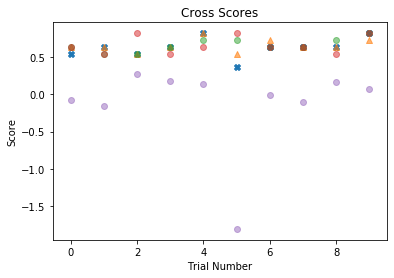

In [14]:
x = range(10)
fig, ax = plt.subplots()
ax.scatter(x, log_reg_cross, marker='X')
ax.scatter(x, lin_svm_cross, alpha = .6, marker='^')
ax.scatter(x, rbf_svm_cross, alpha = .5)
ax.scatter(x, poly_svm_cross, alpha = .5)
ax.set_xlabel("Trial Number")
ax.set_ylabel("Score")
ax.set_title("Cross Scores")

Averages of cross scores

In [13]:
print("Logistic Regression =", sum(log_reg_cross) / len(log_reg_cross))
print("Linear SVM =", sum(lin_svm_cross) / len(lin_svm_cross))
print("RBF SVM =", sum(rbf_svm_cross) / len(rbf_svm_cross))
print("Poly SVM =", sum(poly_svm_cross) / len(poly_svm_cross))

Logistic Regression = 0.6272727272727273
Linear SVM = 0.6545454545454547
RBF SVM = 0.6636363636363638
Poly SVM = 0.6636363636363637
Kernel Ridge = -0.1351335707323611


Regularization of SVM 

In [161]:
lin_svm_train_C = []
lin_svm_cross_C = []
rbf_svm_train_C = []
rbf_svm_cross_C = []
poly_svm_train_C = []
poly_svm_cross_C = []
for i in range(1, 200, 5):
    X_train, X_cross, y_train, y_cross = model_selection.train_test_split(X_std, y, train_size=.8, random_state=1)
    # Support Vector Machine:
    clf1 = svm.SVC(kernel='linear', C=i, gamma=1, random_state=1)
    clf1.fit(X_train, y_train)
    lin_svm_train_C.append(clf1.score(X_train, y_train))
    lin_svm_cross_C.append(clf1.score(X_cross, y_cross))
    clf2 = svm.SVC(kernel='rbf', C=i, gamma=1, random_state=1)
    clf2.fit(X_train, y_train)
    rbf_svm_train_C.append(clf2.score(X_train, y_train))
    rbf_svm_cross_C.append(clf2.score(X_cross, y_cross))
    clf3 = svm.SVC(kernel='poly', C=i, gamma=1, random_state=1)
    clf3.fit(X_train, y_train)
    poly_svm_train_C.append(clf3.score(X_train, y_train))
    poly_svm_cross_C.append(clf3.score(X_cross, y_cross))

Linear SVM: Blue,
RBF SVM: Orange,
Poly SVM: Green

Text(0.5, 1.0, 'Train Scores')

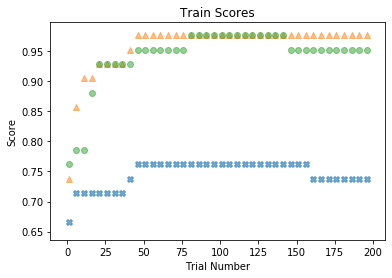

In [162]:
x = range(1, 200, 5)
fig, ax = plt.subplots()
ax.scatter(x, lin_svm_train_C, alpha = .6, marker='X')
ax.scatter(x, rbf_svm_train_C, alpha = .5, marker='^')
ax.scatter(x, poly_svm_train_C, alpha = .5)
ax.set_xlabel("Trial Number")
ax.set_ylabel("Score")
ax.set_title("Train Scores")

Text(0.5, 1.0, 'Cross Scores')

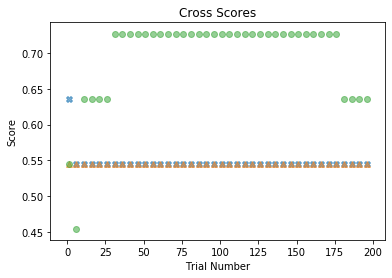

In [163]:
x = range(1, 200, 5)
fig, ax = plt.subplots()
ax.scatter(x, lin_svm_cross_C, alpha = .6, marker='X')
ax.scatter(x, rbf_svm_cross_C, alpha = .5, marker='^')
ax.scatter(x, poly_svm_cross_C, alpha = .5)
ax.set_xlabel("Trial Number")
ax.set_ylabel("Score")
ax.set_title("Cross Scores")

Testing out SVM Poly with C = 150

In [155]:
poly_svm_cross_test = []
for i in range(1000):
    X_train, X_cross, y_train, y_cross = model_selection.train_test_split(X_std, y, train_size=.8, random_state=i)
    clf3 = svm.SVC(kernel='poly', C=150, gamma=1, random_state=i)
    clf3.fit(X_train, y_train)
    poly_svm_cross_test.append(clf3.score(X_cross, y_cross))

Text(0.5, 1.0, 'Cross Scores')

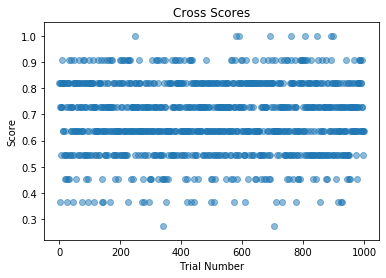

In [156]:
x = range(1000)
fig, ax = plt.subplots()
ax.scatter(x, poly_svm_cross_test, alpha = .5)
ax.set_xlabel("Trial Number")
ax.set_ylabel("Score")
ax.set_title("Cross Scores")

In [157]:
print("Average Poly SVM =", sum(poly_svm_cross_test) / len(poly_svm_cross_test))


Average Poly SVM = 0.6851818181818197
